In [1]:
# Initializations
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%config InlineBackend.figure_formats = ['svg']
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'mathtext.fontset': 'cm'})
mpl.rcParams.update({'axes.titlesize': 20})
mpl.rcParams.update({'axes.labelsize': 28})
mpl.rcParams.update({'axes.linewidth': 0.5})
mpl.rcParams.update({'xtick.labelsize': 16})
mpl.rcParams.update({'ytick.labelsize': 16})
mpl.rcParams.update({'legend.framealpha': 1})
mpl.rcParams.update({'axes.titlepad': 12})
mpl.rcParams.update({'figure.dpi': 100})

# Single Probability Map

full dataset size = (2578, 90)
N_sample = 9432


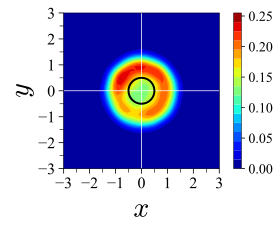

In [20]:
%reset -f array
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# load dataset
# dataset = pd.read_csv('./Data/Re40_phi01_45000',
#                       header=None, delim_whitespace=True).values
dataset = pd.read_csv('../dataset/Re40_phi04',
                      header=None, delim_whitespace=True).values

X = dataset[::1, :np.size(dataset,axis=1) - 6]
Y = dataset[::1, np.size(dataset, axis=1) - 4]

dF = Y - np.mean(Y)

print(f'full dataset size = {X.shape}')

num_p_incl = 1
bandwidth = 1.4
levels = 20
lim = 3
a = 0.1

X1_tmp = np.array([])
X2_tmp = np.array([])
X3_tmp = np.array([])

# This is for drag: _________________________________________
condition = dF > +a * np.std(dF)
# condition = dF < -a * np.std(dF)


# This is for lift and torque: _________________________________________
# condition = np.logical_or(
#     dF > +a * np.std(dF),
#     dF < -a * np.std(dF))

# for i_particle in [num_p_incl - 1]:
for i_particle in range(0, 8):
# for i_particle in range(3, 8):
    X1, X2, X3 = X[:, 3*i_particle], X[:, 3*i_particle+1], X[:, 3*i_particle+2]
    
    X1_tmp = np.append(X1_tmp, X1[condition])
    X2_tmp = np.append(X2_tmp, X2[condition])
    X3_tmp = np.append(X3_tmp, X3[condition])
    
# symmetry for the plots have been enforced about the y-plane
# X1_tmp = np.append(X1_tmp, X1_tmp)
# X2_tmp = np.append(X2_tmp, -X2_tmp)
# X3_tmp = np.append(X3_tmp, X3_tmp)
    
# X1_tmp = np.append(X1_tmp, X1_tmp)
# X2_tmp = np.append(X2_tmp, X2_tmp)
# X3_tmp = np.append(X3_tmp, -X3_tmp)

print(f'N_sample = {X1_tmp.shape[0]}')

xx, yy = np.mgrid[-lim:lim:50j, -lim:lim:50j]
mesh = np.vstack([xx.ravel(), yy.ravel()])
data = np.vstack([X1_tmp, X2_tmp])

# KDE from scikit-learn _________________________
# from sklearn.neighbors import KernelDensity
# kde = KernelDensity(bandwidth=bandwidth,
#                     metric='euclidean',
#                     kernel='epanechnikov',
#                     algorithm='ball_tree')
# kde.fit(data.T)
# f = np.reshape(np.exp(kde.score_samples(mesh.T)), xx.shape)

# KDE from scipy.stats _________________________
from scipy.stats import gaussian_kde
kde = gaussian_kde(data)
kde.set_bandwidth(bandwidth * kde.scotts_factor())
f = np.reshape(kde(mesh).T, xx.shape)

# Plot using stats KDE _________________________________________
fig, ax1 = plt.subplots(figsize=(4, 4), tight_layout=True)

contour = ax1.contourf(xx, yy, f,
             cmap='jet',
             levels=levels,
             zorder=0)
circ1 = plt.Circle((0,0), radius=0.5,
                   alpha=1,
                   facecolor='none',
                   edgecolor='black',
                   linewidth=2,
                   zorder=2)
ax1.add_patch(circ1)

ax1.set_aspect('equal')

ax1.set_xticks(range(-4,5,1))
ax1.set_yticks(range(-4,5,1))

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.tick_params(which='major', length=5)
ax1.tick_params(which='minor', length=4)

ax1.set_xlabel('$ x $')
ax1.set_ylabel('$ y $')

# ax1.set_title(r'$ \tilde{p} \left( \cup_{j=1}^{15} \mathbf{r}_j \: \vert \: \Delta F_x < -\sigma \right) $', fontsize=17)
# ax1.set_title(r'$ \tilde{p}_1 \left( \mathbf{r}_{' + f'{num_p_incl}' + r'} \: \vert \: \Delta T_z < -\sigma \right) $')

ax1.vlines(x=0, ymin=yy.min(), ymax=yy.max(), color='white', linewidth=0.75, zorder=1)
ax1.hlines(y=0, xmin=xx.min(), xmax=xx.max(), color='white', linewidth=0.75, zorder=1)

# Color bar________________________________
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.2)
cb = fig.colorbar(contour, cax=cax, format='%.2f')

from matplotlib.ticker import FormatStrFormatter
cb.ax.tick_params(labelsize=14)

for l in cb.ax.yaxis.get_ticklabels():
    l.set_family('Times New Roman')

# Set the font name for axis tick labels______________
for tick in ax1.get_xticklabels():
    tick.set_fontname('Times New Roman')
for tick in ax1.get_yticklabels():
    tick.set_fontname('Times New Roman')
    
# remove white lines separating the contours_______________
for c in contour.collections:
    c.set_edgecolor('face')
    
# Adjust number of ticks in colorbar
from matplotlib import ticker
tick_locator = ticker.MaxNLocator(nbins=6)
cb.locator = tick_locator
cb.update_ticks()
    
# fig.savefig('map1.pdf', bbox_inches='tight')

# Grid of Probability Maps

full dataset size = (2578, 90)
N_sample = 2794
N_sample = 4191
N_sample = 5588
N_sample = 6985
N_sample = 8382
N_sample = 9779


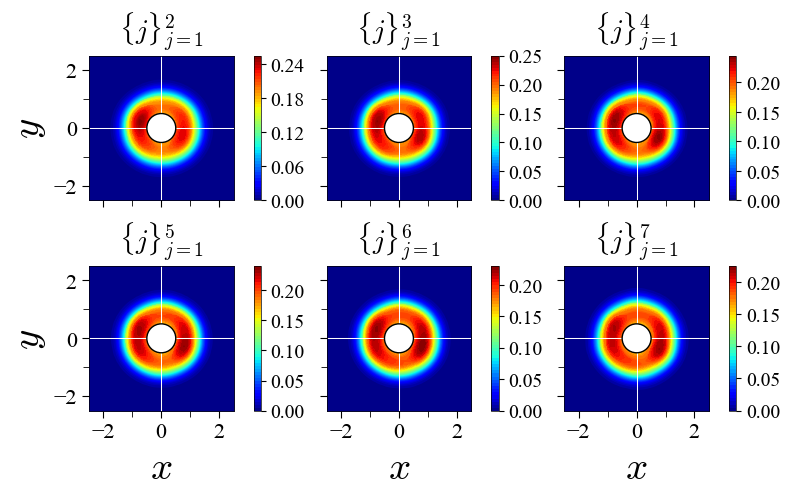

In [460]:
%reset -f array

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from scipy.stats import gaussian_kde

# load dataset
# dataset = pd.read_csv('../../scripts/Probabilistic_Model/datasets/3D_Re40_phi01_45000',
#                       header=None, delim_whitespace=True).values
dataset = pd.read_csv('./Data//new_3D_Re2_phi04',
                      header=None, delim_whitespace=True).values

X = dataset[::1, :np.size(dataset,axis=1)-6]
Y = dataset[::1, np.size(dataset, axis=1)-3]

dF = Y - np.mean(Y)

print(f'full dataset size = {X.shape}')

# particles_list = [1, 3, 5, 7, 12, 17]

start_index = 2
particles_list = [i for i in range(start_index, start_index+6)]

bandwidth = 1.8
levels = 50
lim = 2.5
a = 0

fig, ax = plt.subplots(ncols=3,
                       nrows=2,
                       figsize=(8, 5), tight_layout=True,
                       sharex=True,
                       sharey=True)
ax = ax.ravel()

for i in range(len(particles_list)):
    num_p_incl = particles_list[i]
    X1_tmp = np.array([])
    X2_tmp = np.array([])
    X3_tmp = np.array([])

    # This is for drag: _________________________________________
    condition = dF < -a * np.std(dF)
#     condition = dF > +a * np.std(dF)

    # This is for lift and torque: _________________________________________
#     condition = np.logical_or(
#         dF > +a * np.std(dF),
#         dF < -a * np.std(dF))

#     for i_particle in [num_p_incl - 1]:
    for i_particle in range(0, num_p_incl):
        X1, X2, X3 = X[:, 3*i_particle], X[:, 3*i_particle+1], X[:, 3*i_particle+2]
        X1_tmp = np.append(X1_tmp, X1[condition])
        X2_tmp = np.append(X2_tmp, X2[condition])
        X3_tmp = np.append(X3_tmp, X3[condition])

    print(f'N_sample = {X1_tmp.shape[0]}')

    # Plot using stats KDE _________________________________________
    xx, yy = np.mgrid[-lim:lim:50j, -lim:lim:50j]
    mesh = np.vstack([xx.ravel(), yy.ravel()])
    data = np.vstack([X1_tmp, X2_tmp])
    kde = gaussian_kde(data)
    kde.set_bandwidth(bandwidth * kde.scotts_factor())

    f = np.reshape(kde(mesh).T, xx.shape)

    contour = ax[i].contourf(xx, yy, f,
                 cmap="jet",
                 levels=levels,
                 zorder=0)
    circ1 = plt.Circle((0,0), radius=0.5,
                       alpha=1,
                       facecolor='white',
                       edgecolor='black',
                       zorder=2)
    ax[i].add_patch(circ1)

    ax[i].set_aspect('equal')

    ax[i].set_xticks(range(-4,5,2))
    ax[i].set_yticks(range(-4,5,2))

    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    ax[i].xaxis.set_minor_locator(AutoMinorLocator(2))
    ax[i].yaxis.set_minor_locator(AutoMinorLocator(2))
    ax[i].tick_params(which='major', length=5)
    ax[i].tick_params(which='minor', length=4)
    
    # Customization of x and y labels:
    if i in [3, 4, 5]:
        ax[i].set_xlabel('$ x $')
    if i in [0, 3]:
        ax[i].set_ylabel('$ y $')
    
#     ax[i].set_title(f'$ j={num_p_incl} $')
    ax[i].set_title(r'$ \{ j \}_{j=1}^{' + f'{num_p_incl}' + r'} $')

    ax[i].vlines(x=0, ymin=yy.min(), ymax=yy.max(), color='white', linewidth=0.75, zorder=1)
    ax[i].hlines(y=0, xmin=xx.min(), xmax=xx.max(), color='white', linewidth=0.75, zorder=1)

    # Color bar________________________________
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes('right', size='5%', pad=0.2)
    cb = fig.colorbar(contour, cax=cax, format='%.2f')

    from matplotlib.ticker import FormatStrFormatter
    cb.ax.tick_params(labelsize=14)

    for l in cb.ax.yaxis.get_ticklabels():
        l.set_family('Times New Roman')

    # Set the font name for axis tick labels______________
    for tick in ax[i].get_xticklabels():
        tick.set_fontname('Times New Roman')
    for tick in ax[i].get_yticklabels():
        tick.set_fontname('Times New Roman')
    # remove white lines separating the contours_______________
    for c in contour.collections:
        c.set_edgecolor('face')

    # Adjust number of ticks in colorbar
    from matplotlib import ticker
    tick_locator = ticker.MaxNLocator(nbins=5)
    cb.ax.yaxis.set_major_locator(ticker.AutoLocator())
    cb.locator = tick_locator
    cb.update_ticks()
    
# fig.savefig('map1.pdf', bbox_inches='tight')

# Probability map when the location of one neighbor is fixed:

full dataset size = (2984, 90)
N_sample = 751


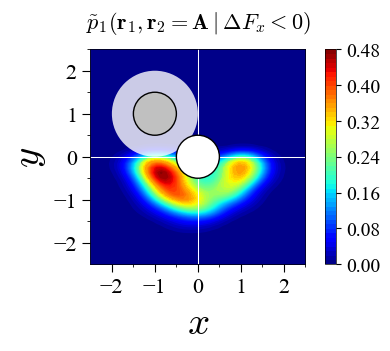

In [444]:
%reset -f array

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# load dataset
# dataset = pd.read_csv('../dataset/Re40_phi01_45000',
#                       header=None, delim_whitespace=True).values
dataset = pd.read_csv('./Data//Re150_phi01',
                      header=None, delim_whitespace=True).values

X = dataset[::1, :np.size(dataset,axis=1)-6]
Y = dataset[::1, np.size(dataset, axis=1)-3]

dF = Y - np.mean(Y)

print(f'full dataset size = {X.shape}')

num_p_incl = 1
bandwidth = 1.2
levels = 50
lim = 2.5
a = 0

X1_tmp = np.array([])
X2_tmp = np.array([])
X3_tmp = np.array([])

# This is for drag: _________________________________________
condition = dF < -a * np.std(dF)
# condition = dF > +a * np.std(dF)

i_neighbor = 1
x0, y0 = -1 , 1
eps = 0.5

# condition = np.logical_and(np.logical_and(
#                                             condition,
#                                             abs(X[:, 3 * i_neighbor] - x0) <= eps),
#                                             abs(X[:, 3 * i_neighbor + 1] - y0) <= eps)
# #                                             (X[:, 3 * i_neighbor] > x0)),
# #                                             (X[:, 3 * i_neighbor + 1] > y0))

condition = np.logical_and(condition, X[:, 1] < y0 - 1 )
    
# This is for lift and torque: _________________________________________
# condition = np.logical_or(
#     dF > +a * np.std(dF),
#     dF < -a * np.std(dF))

for i_particle in [num_p_incl - 1]:
# for i_particle in range(0, num_p_incl):
    X1, X2, X3 = X[:, 3*i_particle], X[:, 3*i_particle+1], X[:, 3*i_particle+2]
    
    X1_tmp = np.append(X1_tmp, X1[condition])
    X2_tmp = np.append(X2_tmp, X2[condition])
    X3_tmp = np.append(X3_tmp, X3[condition])
    
print(f'N_sample = {X1_tmp.shape[0]}')

xx, yy = np.mgrid[-lim:lim:50j, -lim:lim:50j]
mesh = np.vstack([xx.ravel(), yy.ravel()])
data = np.vstack([X1_tmp, X2_tmp])

# KDE from scikit-learn _________________________
# from sklearn.neighbors import KernelDensity
# kde = KernelDensity(bandwidth=0.2,
#                     metric='euclidean',
#                     kernel='exponential', algorithm='ball_tree')
# kde.fit(data.T)
# f = np.reshape(np.exp(kde.score_samples(mesh.T)), xx.shape)

# KDE from scipy.stats _________________________
from scipy.stats import gaussian_kde
kde = gaussian_kde(data)
kde.set_bandwidth(bandwidth * kde.scotts_factor())
f = np.reshape(kde(mesh).T, xx.shape)

# Plot using stats KDE _________________________________________
fig, ax1 = plt.subplots(figsize=(4,4), tight_layout=True)

contour = ax1.contourf(xx, yy, f,
             cmap='jet',
             levels=levels,
             zorder=1)
circ1 = plt.Circle((0,0), radius=0.5,
                   alpha=1,
                   facecolor='white',
                   edgecolor='black',
                   zorder=2)
ax1.add_patch(circ1)

circ2 = plt.Circle((x0, y0), radius=0.5,
               alpha=1,
               facecolor='silver',
               edgecolor='black',
               zorder=3)
ax1.add_patch(circ2)

circ3 = plt.Circle((x0, y0), radius=1, alpha=0.8, facecolor='w', edgecolor='none', zorder=1)
ax1.add_patch(circ3)

ax1.set_aspect('equal')

ax1.set_xticks(range(-4,5,1))
ax1.set_yticks(range(-4,5,1))

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.tick_params(which='major', length=6)
ax1.tick_params(which='minor', length=2)

ax1.set_xlabel('$ x $')
ax1.set_ylabel('$ y $')

# ax1.set_title(r'$ \tilde{p} \left( \cup_{j=1}^{15} \mathbf{r}_j \: \vert \: \Delta F_x < -\sigma \right) $', 
#               fontsize=17)

ax1.set_title(r'$ \tilde{p}_1 \left( \mathbf{r}_{' + f'{num_p_incl}' + 
              r'}, \mathbf{r}_2=\mathbf{A} \: \vert \: \Delta F_x < 0 \right) $', 
             fontsize=16, pad=15)

ax1.vlines(x=0, ymin=yy.min(), ymax=yy.max(), color='white', linewidth=0.75, zorder=1)
ax1.hlines(y=0, xmin=xx.min(), xmax=xx.max(), color='white', linewidth=0.75, zorder=1)

# Color bar________________________________
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.2)
cb = fig.colorbar(contour, cax=cax, format='%.2f')

from matplotlib.ticker import FormatStrFormatter
cb.ax.tick_params(labelsize=14)

for l in cb.ax.yaxis.get_ticklabels():
    l.set_family('Times New Roman')

# Set the font name for axis tick labels______________
for tick in ax1.get_xticklabels():
    tick.set_fontname('Times New Roman')
for tick in ax1.get_yticklabels():
    tick.set_fontname('Times New Roman')
    
# remove white lines separating the contours_______________
for c in contour.collections:
    c.set_edgecolor('face')
    
# Adjust number of ticks in colorbar
from matplotlib import ticker
tick_locator = ticker.MaxNLocator(nbins=6)
cb.locator = tick_locator
cb.update_ticks()
    
# fig.savefig('pdf_p_r1_r2.pdf', bbox_inches='tight')